In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import Imputer
import numpy as np
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [351]:
inputdata = pd.read_csv('weatherdatafrom12-19.csv')
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8034 entries, 0 to 8033
Data columns (total 18 columns):
STATION      8034 non-null int64
DATE         8034 non-null object
LATITUDE     8034 non-null float64
LONGITUDE    8034 non-null float64
ELEVATION    8034 non-null float64
NAME         8034 non-null object
TEMP         8034 non-null float64
DEWP         8034 non-null float64
SLP          8034 non-null float64
STP          8034 non-null float64
VISIB        8034 non-null float64
WDSP         8034 non-null float64
MXSPD        8034 non-null float64
GUST         8034 non-null float64
MAX          8034 non-null float64
MIN          8034 non-null float64
PRCP         8034 non-null float64
Class        8034 non-null int64
dtypes: float64(14), int64(2), object(2)
memory usage: 1.1+ MB


In [352]:
inputdata.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,Class
0,72290403178,1/1/12,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",58.1,44.2,1019.1,999.9,7.2,2.3,8.9,0.0,77.0,44.1,0.0,0
1,72290403178,1/2/12,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",58.3,43.4,1021.0,2.1,8.9,1.2,7.0,0.0,75.0,42.8,0.0,0
2,72290403178,1/3/12,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",58.4,44.3,1021.6,2.6,8.5,3.7,9.9,0.0,75.0,45.0,0.0,0
3,72290403178,1/4/12,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",64.2,38.6,1022.3,3.3,9.4,3.5,8.0,0.0,87.1,48.9,0.0,0
4,72290403178,1/5/12,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",68.0,27.5,1020.1,1.3,10.0,5.0,11.1,0.0,84.0,55.9,0.0,0


In [353]:
inputdata.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,Class
count,8.034000e+03,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000,8034.000000
mean,7.229024e+10,32.707267,-117.100705,96.210642,64.147399,52.206746,1034.346477,464.158676,9.221646,4.442930,11.175342,5.433993,74.876363,58.262509,0.025233,0.021036
std,1.608311e+05,0.101180,0.087540,65.940282,7.027083,111.494518,412.893324,491.564995,1.229152,1.622165,27.181244,8.988141,8.473383,157.118082,0.130976,0.143512
min,7.229002e+10,32.572220,-117.183100,4.600000,43.600000,3.900000,1000.100000,0.000000,2.200000,0.900000,4.100000,0.000000,53.100000,30.000000,0.000000,0.000000
25%,7.229002e+10,32.572220,-117.183100,4.600000,59.300000,45.700000,1012.800000,11.200000,8.900000,3.400000,8.900000,0.000000,69.100000,50.000000,0.000000,0.000000
50%,7.229030e+10,32.733600,-117.139440,127.100000,63.600000,52.800000,1015.000000,19.100000,9.800000,4.200000,9.900000,0.000000,75.000000,55.900000,0.000000,0.000000
75%,7.229040e+10,32.815830,-116.979440,157.000000,69.200000,58.500000,1017.600000,996.300000,10.000000,5.200000,11.100000,15.000000,80.100000,62.100000,0.000000,0.000000
max,7.229040e+10,32.815830,-116.979440,157.000000,90.000000,9999.900000,9999.900000,999.900000,10.000000,19.300000,999.900000,79.100000,107.100000,9999.900000,2.920000,1.000000


In [354]:
inputdata.isnull().sum()

STATION      0
DATE         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
NAME         0
TEMP         0
DEWP         0
SLP          0
STP          0
VISIB        0
WDSP         0
MXSPD        0
GUST         0
MAX          0
MIN          0
PRCP         0
Class        0
dtype: int64

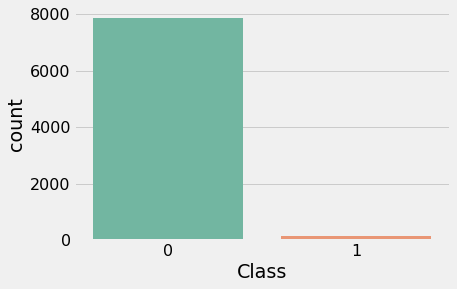

In [355]:
sb.countplot(x='Class',data=inputdata,palette ='Set2')
plt.show()

In [356]:
# Extract the labels
labels = np.array(inputdata.pop('Class'))

In [357]:
inputdata = inputdata.select_dtypes('number')

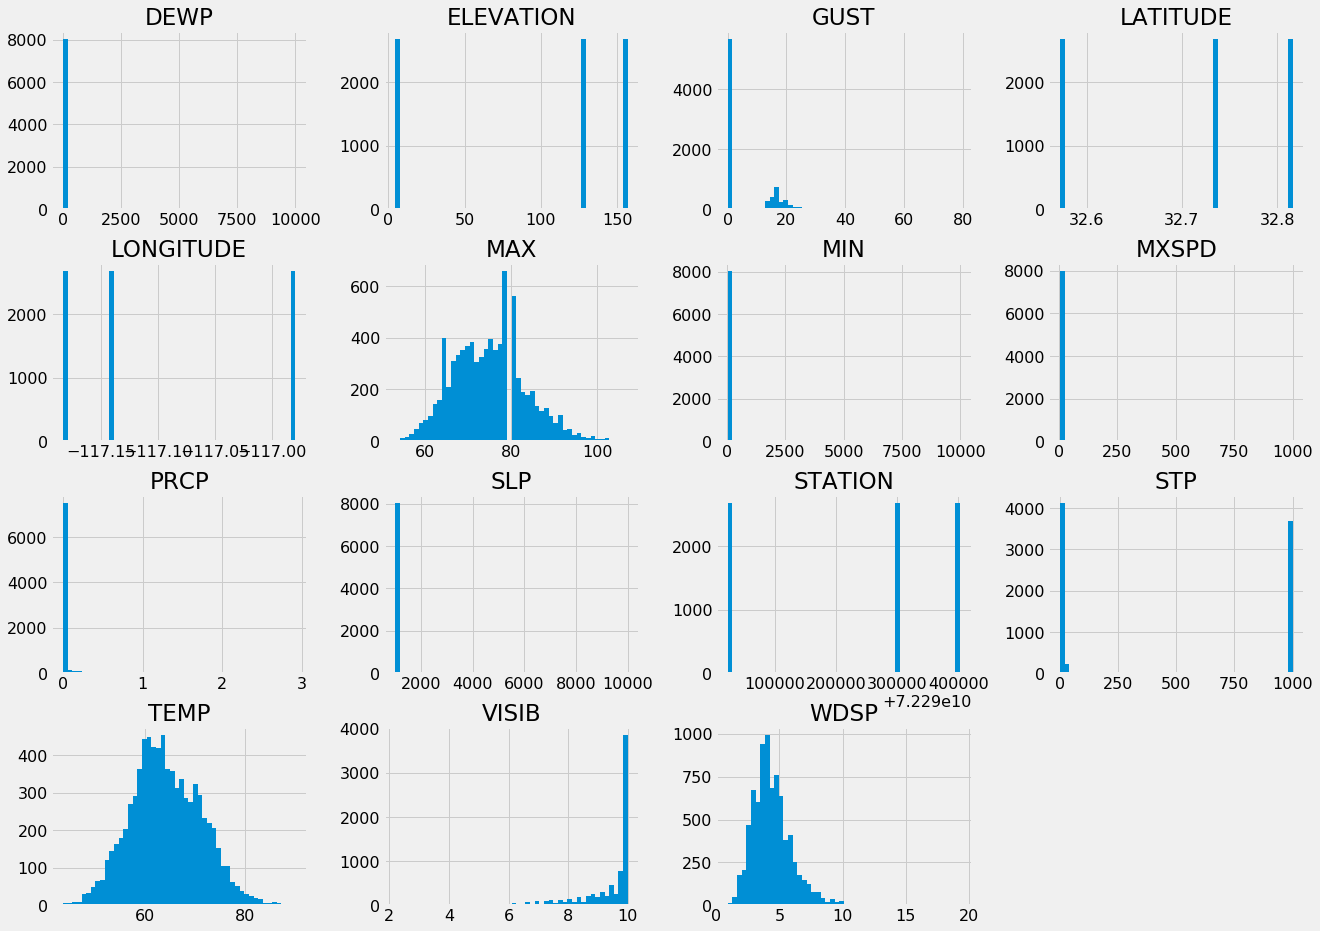

In [358]:
inputdata.hist(bins = 50, figsize = (20,15))
plt.show()

In [359]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(inputdata, labels, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no fire in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of  fire in oversampled data",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of no fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of  fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  11006
Number of no fire in oversampled data 5503
Number of  fire in oversampled data 5503
Proportion of no fire data in oversampled data is  0.5
Proportion of  fire data in oversampled data is  0.5


In [360]:
inputdata = os_data_X
labels = os_data_y

In [361]:
train, test, train_labels, test_labels = train_test_split(inputdata,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = 42)
print(len(train), "train +", len(test), "test")

7704 train + 3302 test


In [362]:
# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [363]:
# Features for feature importances
features = list(train.columns)

In [364]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(train)
X_scaled.mean(axis=0)
X_scaled.std(axis=0)
scaler = preprocessing.StandardScaler().fit(train)
scaler.mean_
scaler.scale_ 
train = scaler.transform(train)
test = scaler.transform(test) 

/Users/shalu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [365]:
inputdata.shape

(11006, 15)

In [366]:
test.shape
train.shape

(7704, 15)

In [388]:
# Create the model with 100 trees
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               n_jobs=-1, max_depth=4,verbose = 1)

In [389]:
# Fit on training data
model.fit(train, train_labels)

/Users/shalu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [390]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 27
Average maximum depth 4


In [391]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [392]:
# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [393]:
test

array([[ 1.05083336, -1.4369612 ,  1.49763209, ...,  0.07143191,
         0.61165422, -0.1392334 ],
       [ 0.42938714,  1.0310579 , -0.37894128, ..., -1.60376128,
        -1.92092805, -0.1392334 ],
       [-1.30949075,  0.19798368, -0.89101124, ...,  0.56413579,
         1.47421959, -0.1392334 ],
       ...,
       [ 1.05083336, -1.4369612 ,  1.49763209, ...,  0.36705424,
        -0.82509918, -0.1392334 ],
       [-1.30949075,  0.19798368, -0.89101124, ...,  0.16997269,
        -1.06861671, -0.1392334 ],
       [-1.30949075,  0.19798368, -0.89101124, ...,  0.12234238,
         1.11937652, -0.1392334 ]])

In [394]:
rf_predictions

array([1, 0, 1, ..., 0, 0, 1])

In [374]:
test_labels

,Class
5091,0
2291,0
8560,1
2233,0
10023,1
8801,1
1244,0
10772,1
966,0
3068,0


In [375]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [376]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

In [377]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, rf_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1651
           1       0.98      0.99      0.99      1651

   micro avg       0.99      0.99      0.99      3302
   macro avg       0.99      0.99      0.99      3302
weighted avg       0.99      0.99      0.99      3302



Recall Baseline: 1.0 Test: 0.99 Train: 1.0
Precision Baseline: 0.5 Test: 0.98 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


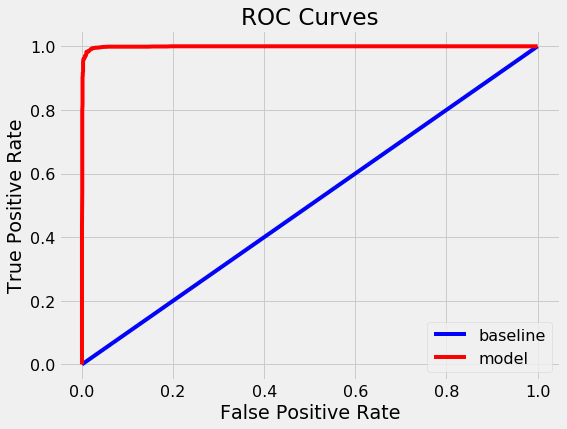

<Figure size 432x288 with 0 Axes>

In [378]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

In [379]:
from sklearn.metrics import confusion_matrix
import itertools

In [380]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[1614   37]
 [  10 1641]]


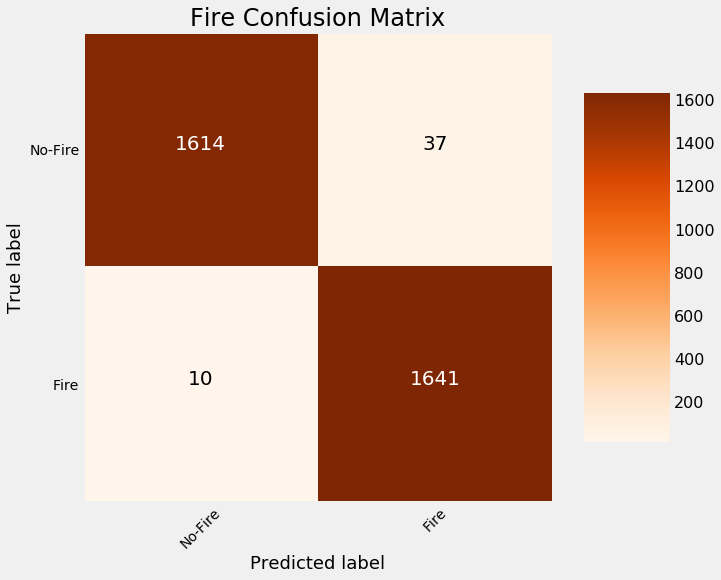

In [381]:
# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['No-Fire', 'Fire'],
                      title = 'Fire Confusion Matrix')

plt.savefig('cm.png')

In [382]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(test_labels, rf_probs)

In [383]:
roc_value

0.9987987017394153

In [384]:
'''
#Feature Importance
# Extract feature importances
fi = pd.DataFrame({'feature': list(train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()
'''

"\n#Feature Importance\n# Extract feature importances\nfi = pd.DataFrame({'feature': list(train.columns),\n                   'importance': model.feature_importances_}).                    sort_values('importance', ascending = False)\n\n# Display\nfi.head()\n"

In [385]:
#Saving the model

import pickle

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model)

In [386]:
# Load the pickled model 
rf_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
rf_from_pickle.predict(test) 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 1, ..., 0, 0, 1])

In [387]:
#Saving model in binary file

with open('RF_model_pickle','wb') as file:
    pickle.dump(model, file)